<a href="https://colab.research.google.com/github/letteredMelody/colab_python/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Знакомство с библиотеками для анализа данных. Pandas

Результат лабораторной работы − отчет в формате ноутбука Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### О задании

Лабораторные работы "NumPy" и "Pandas" направлены на работу с пакетами NumPy, Pandas и Matplotlib путём решения набора задач (да, алгебры и геометрии тут почти нет). В данных заданиях разрешено пользоваться только стандартной библиотекой языка Python, а также пакетами NumPy, Pandas и Matplotlib. Целью заданий является редактирование данного jupyter notebook-a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в заданиях функции.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо добавить ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировками
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

### Аналитика данных с [Pandas](https://pandas.pydata.org/) 

Загрузите таблицу с данными из [```articles.csv```](https://disk.yandex.ru/i/m4rxX9t3MGMrnQ). Удалите записи, в которых присутствуют пропуски.

In [ ]:
import pandas as pd

df = pd.read_csv("articles.csv", engine='python', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

,id,title,publication,author,date,year,month,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016,12,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017,6,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017,1,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017,4,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017,1,"SEOUL, South Korea — North Korea’s leader, ..."
...,...,...,...,...,...,...,...,...
49995,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017,1,"As chairman and CEO of ExxonMobil, Rex Tillers..."
49996,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017,1,I’ve spent nearly 20 years looking at intellig...
49997,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017,1,Donald Trump will not be taking necessary st...
49998,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017,1,Dozens of colleges could be forced to close ...


**(0.5 балла) Задача 1.** Проделайте следующие базовые операции с датафреймами:

1. определите количество различных издательств в таблице;
2. найдите количество опубликованных статей в отрезке [2016-06-01, 2016-12-31];
3. посчитайте распределение статей автора *Tom Ciccotta* по годам;
4. найдите месяц, в котором было наибольшее число статей;
5. выпишите 3 первые статьи автора *John Hayward* в 2016 году.

In [ ]:
df['publication'].nunique()

5

Решение взято [отсюда](https://stackoverflow.com/questions/45759966/counting-unique-values-in-a-column-in-pandas-dataframe-like-in-qlik)

In [ ]:
df[(df.date > '2016-06-01') & (df.date < '2016-12-31')].count()["publication"]  

19266

In [ ]:
df_year = df[['author', 'year', 'title']]
df_year = df_year[df_year.author == 'Tom Ciccotta']
df_year.groupby(['year']).count()

,author,title
year,,
2016,124,124
2017,132,132


In [ ]:
df.groupby(['month'])['title'].agg(['count']).sort_values(by='count', ascending=False).idxmax()["count"]

1

In [ ]:
df[(df.author == 'John Hayward') & (df.year == 2016)].sort_values(by='date', ascending=True).head(3)[['title', 'content']]

,title,content
16861,Indonesian Couple Beaten with Canes for Violat...,Islamic sharia law was enforced with canes onc...
22041,Islamic State Claims Credit For Gun Attack On ...,The Islamic State has claimed responsibility f...
27561,Protests Across India Against Saudi Execution ...,Protests over Saudi Arabia’s execution of Shii...


** Работа со строками в датафрейме. **

Для датафреймов существуют методы работы со строковыми данными. Чтобы применить их, необходимо воспользоваться атрибутом ```str```, после чего вызвать нужные методы работы со строками. Например, вызов:

```df['content'].str.len() ```

подсчитает для каждой строчки в датафрейме количество символов в колонке content. Более подробную информацию про работу с текстовыми данными в Pandas можно найти [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).


**(0.5 балла) Задача 2.**

Найдите в датафрейме всех авторов, имя которых содержит Faith. Выведите Series, состоящий из всех таких уникальных имен.

In [ ]:
authors = pd.Series(df.author, dtype="string")
authors = authors.str.contains("Faith")
index = authors[authors].index
data = df.author.str.strip().str.replace(",", "")[index].unique()
pd.Series(data)

0    Faith Haleh Robinson
1            Faith Karimi
dtype: object

**(1 балл) Задача 3. **

Как можно заметить, в таблице существует множество различных написаний имени Faith Karimi. В основном эти написания различаются пунктуацией - лишние пробелы и запятые. Для правильного подсчета статистик для текстовых данных зачастую возникает необходимость в их предобработке.

Проведите следующие преобразования для колонок *author* и *content*:

1. приведение текста к нижнему регистру;

2. удаление всей пунктуации из текста;

3. удаление пробелов в начале и конце строки;

3. замена подряд идущих пробелов одним пробелом.

Например, строка ```"   It's 6 a.m. and I'm still doing this homework :((    "```

преобразуется в строку  ```its 6 am and im still doing this homework```

Подсчитайте статистику для имени Faith из прошлого задания. Проверьте, что теперь различные способы написания «схлопываются» в один.

In [ ]:
authors = df.author.str.strip().str.lower().replace("  ", " ")
content = df.content.str.strip().str.lower().replace("  ", " ") 

import string

for p in string.punctuation:
  authors = authors.str.replace(p, '')
  content = content.str.replace(p, '')
  
new_authors = pd.Series(authors, dtype="string")
new_authors = new_authors.str.contains("faith")
index = new_authors[new_authors].index
data = authors[index].unique()
pd.Series(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


0    faith haleh robinson
1            faith karimi
dtype: object

**Группировка данных**

С помощью метода [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) удобно группировать данные по значениям одной или нескольких колонок. Далее можно вычислять различные статистики для каждой группы по отдельности.

**(1 балл) Задача 4.**

Выведите для каждого автора максимальное количество публикаций за календарный год (колонка year), а также сам год, на котором достигается этот максимум. Выведите топ-20 строк в порядке убывания количества публикаций.

Пример:

Василий Пупкин написал 3 статьи в 2016, и 4 в 2017, а его брат Иван Пупкин только 1 статью в 2016, а в 2017 он отправился в армию и статей не писал.

Необходимо вывести

```
Василий Пупкин - 2017 - 4
Иван Пупкин    - 2016 - 1
```

Обратите внимание, что несколько вызовов методов над датафреймами можно объединить в один pipeline. Другими словами, можно писать

```
df.func1().func2().funс3()
```

По возможности реализуйте требуемую функцию с помощью **одного** такого пайплайна. Делайте переносы для лучшей читаемости кода.

In [ ]:
df.author = df.author.str.strip().replace('  ', ' ')

for p in string.punctuation:
  df.author = df.author.str.replace(p, '')

df.groupby(['author', 'year'])['publication'].agg(['count']).max(level='author').sort_values(by=['count'], ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  


,count
author,
Breitbart News,1317
Pam Key,820
Charlie Spiering,660
Alex Swoyer,584
Daniel Nussbaum,532
AWR Hawkins,525
John Hayward,521
Jerome Hudson,482
Ian Hanchett,429


**(1 балл) Задача 5.**
Для каждой статьи $i$ исходного датафрейма посчитайте количество статей, опубликованных тем же издательством (publication), к моменту публикации $i$ (включая статьи того же дня).

Обратите внимание, что для всех статей, выпущенных одним издательством в один день, должен получиться одинаковый ответ.

*Hint*. Возможный вариант решения:

1. сгруппировав данные по полям *publication*, *date*, посчитать размер каждой группы;
2. приджойнить размер группы к основному датафрейму с помощью функуии ```pd.merge```.

In [ ]:
df_count = df.groupby(['publication', 'date'])['title'].agg(['count'])
df_count['sorted'] = df_count.sort_values(by=['publication', 'date'], ascending=False)
df_count['earlier'] = df_count.groupby(level='publication')['sorted'].cumsum()

df_merged = df[['publication', 'title', 'date']]
df_merged = df_merged.join(df_count['earlier'], on=["publication", "date"])
df_merged

,publication,title,date,earlier
0,New York Times,House Republicans Fret About Winning Their Hea...,2016-12-31,3632
1,New York Times,Rift Between Officers and Residents as Killing...,2017-06-19,7803
2,New York Times,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",2017-01-06,3763
3,New York Times,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",2017-04-10,7144
4,New York Times,Kim Jong-un Says North Korea Is Preparing to T...,2017-01-02,3652
...,...,...,...,...
49995,Atlantic,"Rex Tillerson Says Climate Change Is Real, but …",2017-01-11,171
49996,Atlantic,The Biggest Intelligence Questions Raised by t...,2017-01-11,171
49997,Atlantic,Trump Announces Plan That Does Little to Resol...,2017-01-11,171
49998,Atlantic,Dozens of For-Profit Colleges Could Soon Close,2017-01-11,171


### [Разреженные матрицы](https://ru.wikipedia.org/wiki/Разреженная_матрица)



Вот здесь http://docs.scipy.org/doc/scipy/reference/sparse.html можно посмотреть, как различные форматы разреженных матриц реализованы в библиотеке `scipy`.

Вот здесь https://www.cise.ufl.edu/research/sparse/matrices/index.html выложено много разреженных матриц из разнообразных приложений. Что особенно приятно, сайт предоставляет удобный клиент для скачивания, в котором доступен предпросмотр и данные о том, являются ли матрицы симметричными или положительно определёнными.

Торговая сеть предоставила вам данные о покупках своих клиентов, представляющие собою 
таблицу со столбцами 
* Номер записи
* *InvoiceNo* - номер чека
* *StockCode* - код товара
* *Description* - название товара

Чтобы понять, какие товары покупают вместе, вы решили построить (разреженную) матрицу, строки и столбцы которой соответствуют различным товарам, а в клетке с "номером" $(g_1, g_2)$ стоит число $c(g_1 \& g_2)$ --- количество чеков, содержащих оба товара. 

**(1 балл) Задача 6.** Ниже приведён код, который вам нужно дополнить, дописав функцию ``CreateMatrix``, создающую из структуры pandas.DataFrame разреженную матрицу. Ваша реализация должна удовлетворять следующим свойствам:
* матрица должна создаваться эффективно и по возможности с минимальным числом циклов;
* итоговая матрица должна позволять быстро отвечать на следующие вопросы:
  - сколько всего было куплено товаров данного типа?
  - какие пары товаров покупались вместе чаще всего?
  - какие товары чаще всего покупались вместе с данным товаром?

Пожалуйста, объясните, почему вы выбрали именно ту, а не иную архитектуру.

Загрузите таблицу с данными из [```Online Retail Short```](https://disk.yandex.ru/d/uDhAhZ6faBQ6jA)
Загрузим данные:

In [ ]:
import pandas as pd
receipts = pd.read_csv('Online Retail Short.csv', sep=';')

Распечатаем первые несколько строк, чтобы осознать структуру данных:

In [ ]:
receipts.head()

,Unnamed: 0,InvoiceNo,StockCode,Description
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,1,536365,71053,WHITE METAL LANTERN
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.


А теперь та самая функция. Вам могут пригодиться следующие конструкции:

* ``for name, group in data.groupby('InvoiceNo')`` --- цикл, в котором ``name`` будут различными значениями ``InvoiceNo``, а ``group`` --- кусками нашего ``DataFrame`` с заданным значением ``InvoiceNo``.
* ``for g1, g2 in itertools.combinations(list(group['StockCode']), 2)`` --- цикл, пробегающий пары различных элементов (сочетания по 2) из списка товаров из заданной группы.

In [ ]:
import scipy.sparse as sps
import itertools

# Зачем бы нужны следующие две строки?)
idx2code = sorted(set(receipts['StockCode']))
code2idx = {code : i for i, code in enumerate(idx2code)}

def CreateMatrix(data):
    '''
    Ввод
    -----
    receipts: структура pandas.DataFrame
    
    Вывод
    ------
    res: разреженная матрица
    '''
    # Your code here
    raise NotImplementedError()

**(1 балл) Задача 7.** C помощью созданной вами матрицы ответьте на несколько вопросов:

1) Какая пара товаров была куплена вместе наибольшее число раз? Пожалуйста, в качестве ответа укажите не `id`, а названия из столбца ``Descriptions``.

2) Что чаще всего покупали вместе с ``KNITTED UNION FLAG HOT WATER BOTTLE``?

В вашем ноутбуке должно быть продемонстрировано, как вы это находите с помощью матрицы!

### Визуализация ([Matplotlib](https://matplotlib.org/stable/index.html))

Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

![](https://imgs.xkcd.com/comics/convincing.png)

In [ ]:
# Графическая библиотека
import matplotlib.pyplot as plt

# Позволяет отрисовывать графики и изображения прямо в ноутбуке, а не в отдельном окне. Жизненно важная вещь!
%matplotlib inline

In [ ]:
import numpy as np

**(0.5 балла) Задача 8.** Используя функцию ```gen_uncertain_data``` для генерации выборки, отобразите на графике синим цветом функцию ```y(x)```, а также ее доверительный интервал в виде закрашенной зеленым цветом области от ```y[i] - error[i]``` до ```y[i] + error[i]```. Полезной может оказаться функция fill_between.

    def gen_uncertain_data():
        x = np.linspace(0, 30, 100)
        y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
        error = np.random.normal(0.1, 0.02, size=y.shape)
        return x, y, error

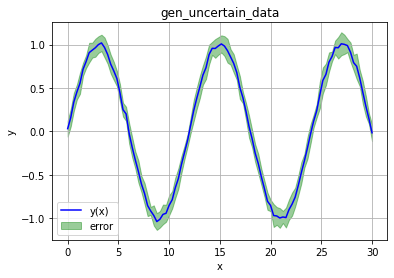

In [ ]:
x, y, error = gen_uncertain_data()


fig,ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.title(label='gen_uncertain_data')
plt.plot(x, y, color="b", label="y(x)")
plt.grid()
plt.fill_between(x, y - error, y + error, color="g", alpha=0.4, label="error")
plt.legend()

**(0.5 балла) Задача 9.** Bизуализируйте соотношение различных издательств, используя [pie plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-pie).


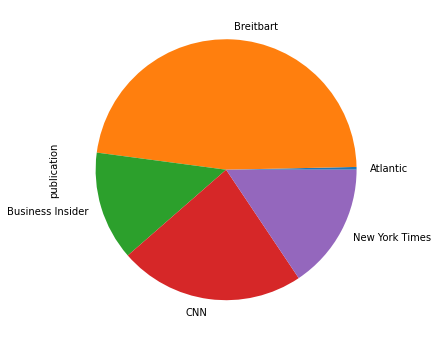

In [ ]:
df.groupby(['publication'])['publication'].count().plot.pie(figsize=(6, 6))

**(0.5 балла) Задача 10.** Постройте распределение количества публикаций каждого издания по каждому году, используя [bar plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-barplot). В какой год было больше всего публикаций?

Text(0.5, 1.0, 'Percentage of every publication per year')

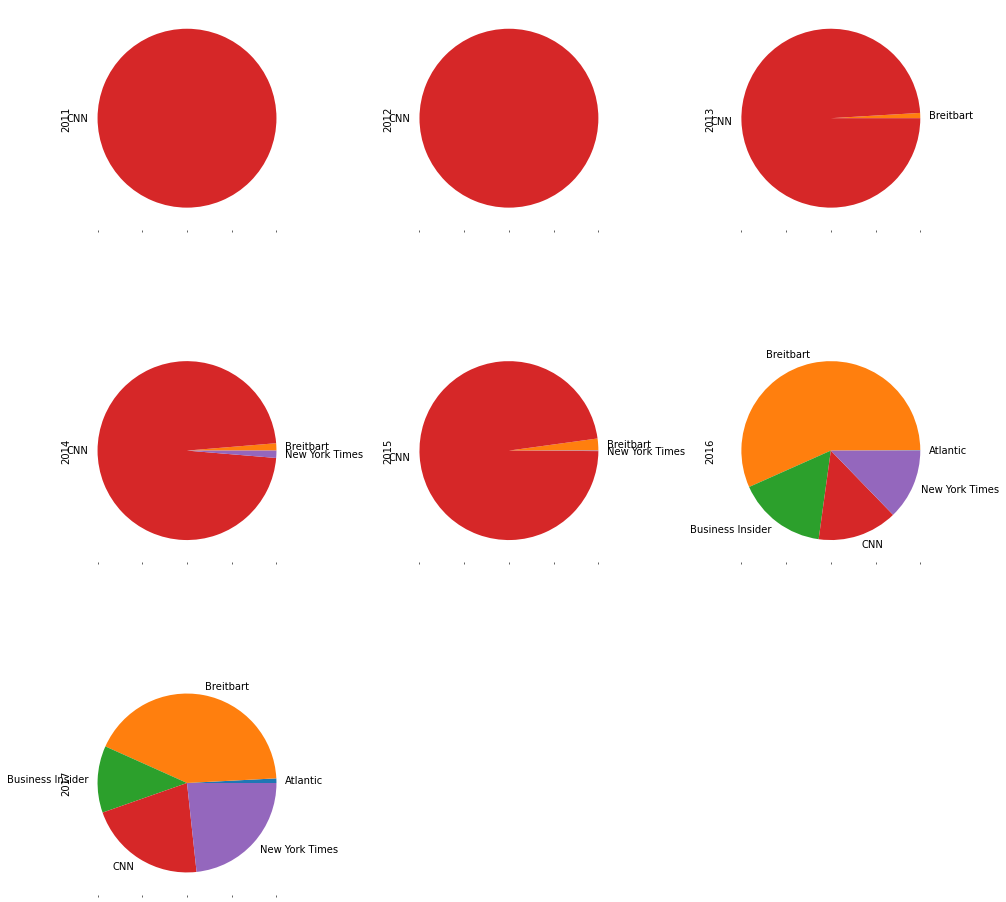

In [ ]:
publ_per_year = df.groupby(['year','publication'])['title'].count()
publ_per_year = publ_per_year.unstack(level=0).plot(kind='pie', subplots=True, figsize=(14, 14), layout=(3, 3), legend=False)
plt.tight_layout()
plt.title('Percentage of every publication per year')

**(0.5 балла) Задача 11.** Изобразите распределение длин заголовков (*title*) статей для каждого издательства. Для этого можно воспользоваться, например, функцией [sns.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html).